<a href="https://colab.research.google.com/github/Ozlem-Rod/Data-Analytics/blob/main/NYC_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving NYPD_Arrest_Data__Year_to_Date__20250402.csv to NYPD_Arrest_Data__Year_to_Date__20250402.csv


In [3]:
import pandas as pd
df = pd.read_csv('NYPD_Arrest_Data__Year_to_Date__20250402.csv')

In [ ]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,281369711,01/30/2024,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306501,F,M,25,0,25-44,M,BLACK,1000558,231080,40.800930,-73.941098,POINT (-73.9410982410066 40.8009303727402)
1,284561406,03/30/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,44,0,25-44,M,BLACK,1004297,242846,40.833209,-73.927554,POINT (-73.927554 40.833209)
2,284896016,04/06/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,19,0,25-44,M,BLACK,997304,222853,40.778348,-73.952863,POINT (-73.952863 40.778348)
3,285569016,04/18/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,69,0,25-44,M,BLACK,1010576,175628,40.648698,-73.905128,POINT (-73.905128 40.648698)
4,287308954,05/22/2024,464.0,JOSTLING,230.0,JOSTLING,PL 1652501,M,M,18,0,18-24,M,WHITE,991530,217373,40.763313,-73.973717,POINT (-73.973717 40.763313)


In [ ]:
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,2.605030e+05,260495.000000,260471.000000,260503.000000,260503.000000,2.605030e+05,260503.000000,260499.000000,260499.000000
mean,2.893983e+08,431.642008,252.544955,63.410936,0.904542,1.005552e+06,207816.822739,40.735495,-73.920132
std,5.439968e+06,271.557874,144.942419,34.955962,6.882318,2.203680e+04,29500.726774,0.265042,0.464304
min,2.797635e+08,2.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.252711
25%,2.847299e+08,117.000000,114.000000,40.000000,0.000000,9.907960e+05,185644.000000,40.676190,-73.976436
50%,2.894597e+08,397.000000,341.000000,63.000000,0.000000,1.005257e+06,206961.000000,40.734681,-73.924170
75%,2.941042e+08,705.000000,344.000000,101.000000,0.000000,1.017771e+06,235593.000000,40.813303,-73.879026
max,2.987485e+08,997.000000,995.000000,483.000000,97.000000,1.067220e+06,271282.000000,40.911236,0.000000


In [ ]:
df.describe(include='object')

,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,New Georeferenced Column
count,260503,260503,260503,260503,259113,260503,260503,260503,260503,260499
unique,366,257,60,1151,6,5,5,2,7,44251
top,03/14/2024,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,25-44,M,BLACK,POINT (-73.881509 40.671404)
freq,1040,28202,38238,27625,146772,72325,152034,213587,122049,1584


In [4]:
by_borough = df.groupby(['ARREST_BORO']).size().sort_values(ascending=False)
print(by_borough)

ARREST_BORO
K    72325
M    61969
B    58521
Q    56633
S    11055
dtype: int64


In [5]:
by_race = df.groupby(['PERP_RACE']).size().sort_values(ascending=False)
print(by_race)

PERP_RACE
BLACK                             122049
WHITE HISPANIC                     69131
BLACK HISPANIC                     26549
WHITE                              26161
ASIAN / PACIFIC ISLANDER           14838
UNKNOWN                              956
AMERICAN INDIAN/ALASKAN NATIVE       819
dtype: int64


In [4]:
by_def = df.groupby(['OFNS_DESC']).size().sort_values(ascending=False)
print(by_def)

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES        38238
PETIT LARCENY                       27107
FELONY ASSAULT                      22606
DANGEROUS DRUGS                     18519
MISCELLANEOUS PENAL LAW             16541
VEHICLE AND TRAFFIC LAWS            13783
OTHER OFFENSES RELATED TO THEFT     12621
ROBBERY                             12020
CRIMINAL MISCHIEF & RELATED OF      11854
GRAND LARCENY                       11804
DANGEROUS WEAPONS                   10780
OFFENSES AGAINST PUBLIC ADMINI       8712
BURGLARY                             6450
SEX CRIMES                           5940
FORGERY                              4961
OFFENSES INVOLVING FRAUD             4611
OFF. AGNST PUB ORD SENSBLTY &        4274
POSSESSION OF STOLEN PROPERTY        4050
OTHER STATE LAWS                     3940
CRIMINAL TRESPASS                    2769
INTOXICATED & IMPAIRED DRIVING       2601
OTHER TRAFFIC INFRACTION             2352
GRAND LARCENY OF MOTOR VEHICLE       2086
OFFENSES AGAINST THE PER

In [15]:
df = df.dropna(subset=['OFNS_DESC'])


In [17]:
df['OFNS_DESC'].isna().sum()

np.int64(0)

In [22]:
df = df[~df['OFNS_DESC'].isin(['(null)', 'Nan', '', ' '])]

In [23]:
pivot_table = df.groupby(['OFNS_DESC','PERP_RACE']).size().unstack(fill_value=0)
print(pivot_table)

PERP_RACE                         AMERICAN INDIAN/ALASKAN NATIVE  \
OFNS_DESC                                                          
ADMINISTRATIVE CODE                                            0   
ADMINISTRATIVE CODES                                           0   
ALCOHOLIC BEVERAGE CONTROL LAW                                 1   
ANTICIPATORY OFFENSES                                          0   
ARSON                                                          0   
ASSAULT 3 & RELATED OFFENSES                                 199   
BURGLAR'S TOOLS                                                1   
BURGLARY                                                      14   
CANNABIS RELATED OFFENSES                                      2   
CHILD ABANDONMENT/NON SUPPORT 1                                0   
CRIMINAL MISCHIEF & RELATED OF                                37   
CRIMINAL TRESPASS                                              7   
DANGEROUS DRUGS                                 

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


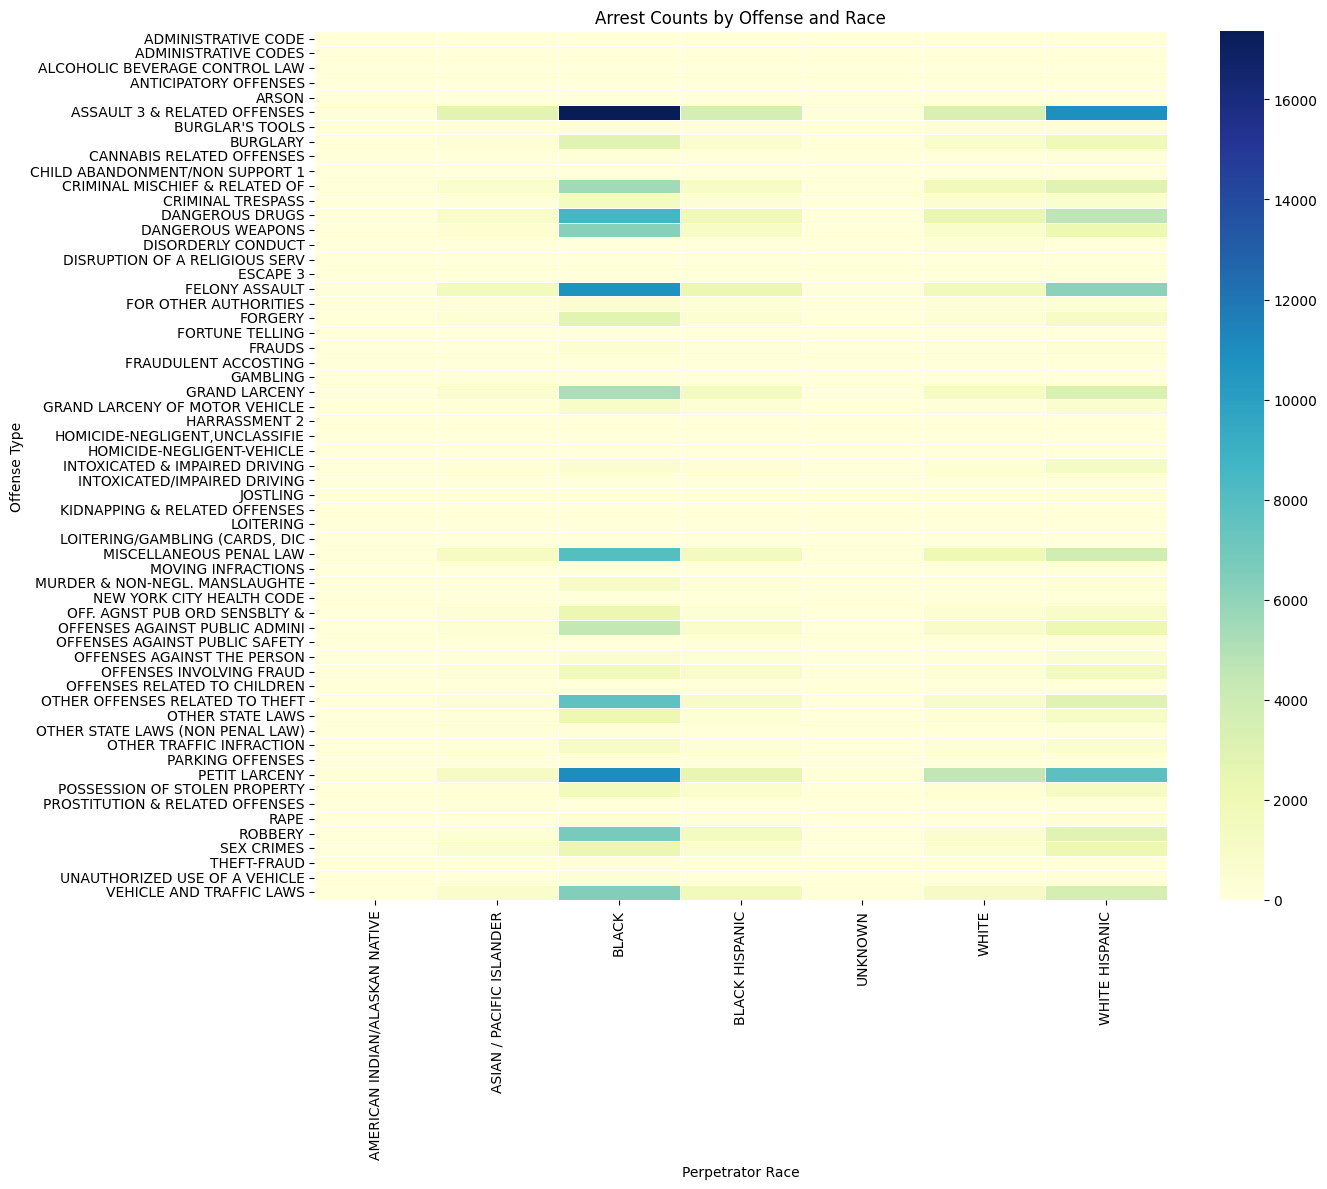

In [25]:
plt.figure(figsize=(14, 12))
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=.5)
plt.title("Arrest Counts by Offense and Race")
plt.xlabel("Perpetrator Race")
plt.ylabel("Offense Type")
plt.tight_layout()
plt.show()

In [6]:
pivot_table = df.groupby(['ARREST_BORO','PERP_RACE']).size().unstack(fill_value=0)
print(pivot_table)

PERP_RACE    AMERICAN INDIAN/ALASKAN NATIVE  ASIAN / PACIFIC ISLANDER  BLACK  \
ARREST_BORO                                                                    
B                                       109                       910  26978   
K                                       175                      3626  40952   
M                                       193                      2373  29580   
Q                                       301                      7450  19895   
S                                        41                       479   4644   

PERP_RACE    BLACK HISPANIC  UNKNOWN  WHITE  WHITE HISPANIC  
ARREST_BORO                                                  
B                     11302      264   1806           17152  
K                      4138      193   8869           14372  
M                      7063      261   7259           15240  
Q                      3528      172   5240           20047  
S                       518       66   2987            2320  


In [7]:
pivot_p = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
print(pivot_p)

PERP_RACE    AMERICAN INDIAN/ALASKAN NATIVE  ASIAN / PACIFIC ISLANDER  \
ARREST_BORO                                                             
B                                  0.186258                  1.554997   
K                                  0.241963                  5.013481   
M                                  0.311446                  3.829334   
Q                                  0.531492                 13.154874   
S                                  0.370873                  4.332881   

PERP_RACE        BLACK  BLACK HISPANIC   UNKNOWN      WHITE  WHITE HISPANIC  
ARREST_BORO                                                                  
B            46.099691       19.312725  0.451120   3.086072       29.309137  
K            56.622191        5.721396  0.266851  12.262703       19.871414  
M            47.733544       11.397634  0.421178  11.713921       24.592942  
Q            35.129695        6.229583  0.303710   9.252556       35.398089  
S            42.0081

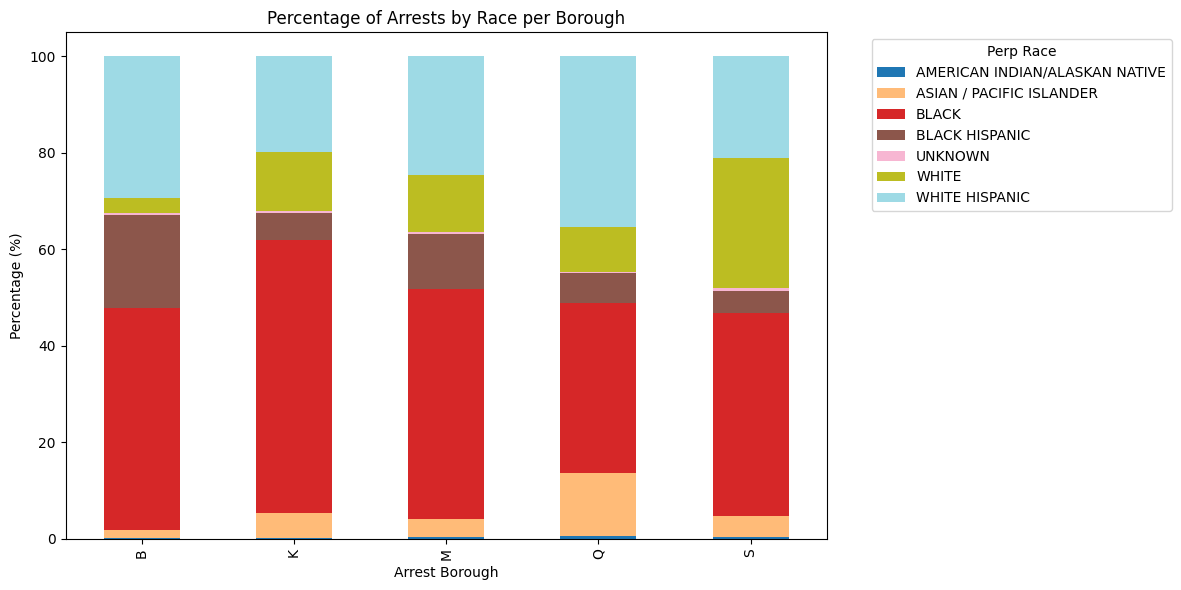

In [9]:
pivot_p.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Percentage of Arrests by Race per Borough')
plt.xlabel('Arrest Borough')
plt.ylabel('Percentage (%)')
plt.legend(title='Perp Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [26]:
pivot_percent = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
print(pivot_percent.round(2))

PERP_RACE                         AMERICAN INDIAN/ALASKAN NATIVE  \
OFNS_DESC                                                          
ADMINISTRATIVE CODE                                         0.00   
ADMINISTRATIVE CODES                                        0.00   
ALCOHOLIC BEVERAGE CONTROL LAW                              0.52   
ANTICIPATORY OFFENSES                                       0.00   
ARSON                                                       0.00   
ASSAULT 3 & RELATED OFFENSES                                0.52   
BURGLAR'S TOOLS                                             0.14   
BURGLARY                                                    0.22   
CANNABIS RELATED OFFENSES                                   0.50   
CHILD ABANDONMENT/NON SUPPORT 1                             0.00   
CRIMINAL MISCHIEF & RELATED OF                              0.31   
CRIMINAL TRESPASS                                           0.25   
DANGEROUS DRUGS                                 

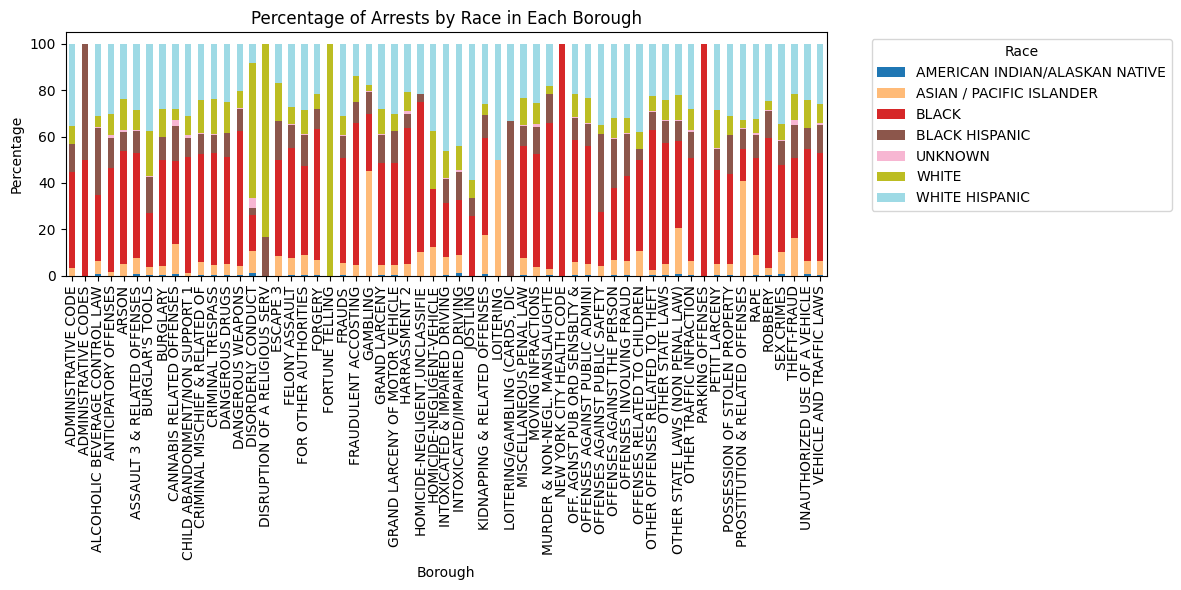

In [28]:
pivot_percent.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("Percentage of Arrests by Race in Each Borough")
plt.ylabel("Percentage")
plt.xlabel("Borough")
plt.legend(title="Race", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
